In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
result = np.zeros((62,160,10))
i=0

In [3]:

months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(150,160)]
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.TEMP.nc')
        plotvar = data.variables['TEMP'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        lont = lont[140:300,950]
        latt = latt[140:300,950]
        plotvar = plotvar[:,140:300,950]
        plotvar[plotvar == -1.0] = np.nan
        #aveplot = plotvar.mean(axis=0)
        #aveplot = aveplot.mean(axis=0)
        result[:,:,i] = plotvar[:,:]
        
        i = i + 1

In [4]:
#data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0118-09.TEMP.nc')
#plotvar = data.variables['TEMP'][0,:,:]
#lont = data.variables['TLONG']
#latt = data.variables['TLAT']

In [5]:
data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn1/z_t.nc')
A = data1.variables['z_t'][:]/100

In [6]:
tem = result.mean(axis=2)

In [7]:

#lont = lont[140:300,950]
#latt = latt[140:300,950]
#plotvar = plotvar[:,140:300,950]
#plotvar[plotvar == -1.0] = np.nan
# 900 ~ -20, 1100 ~ 0

In [8]:
#data2=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0118-09.PD.nc')
#PD = data2.variables['PD'][0,:,:]
#PD = PD[:,140:300,950]
#PD[PD == -1.0] = np.nan
#PD = (PD-1)*1000

In [9]:
result2 = np.zeros((62,160,10))


In [10]:

months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(150,160)]
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.PD.nc')
        plotvar = data.variables['PD'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        lont = lont[140:300,950]
        latt = latt[140:300,950]
        plotvar = plotvar[:,140:300,950]
        plotvar[plotvar == -1.0] = np.nan
        #aveplot = plotvar.mean(axis=0)
        #aveplot = aveplot.mean(axis=0)
        result2[:,:,i] = plotvar[:,:]
        
        i = i + 1

In [11]:
PD = np.nanmean(result2,axis=2)

In [12]:
PD = (PD-1)*1000

In [13]:
lont

masked_array(data=[345.05, 345.05, 345.05, 345.05, 345.05, 345.05, 345.05,
                   345.05, 345.05, 345.05, 345.05, 345.05, 345.05, 345.05,
                   345.05, 345.05, 345.05, 345.05, 345.05, 345.05, 345.05,
                   345.05, 345.05, 345.05, 345.05, 345.05, 345.05, 345.05,
                   345.05, 345.05, 345.05, 345.05, 345.05, 345.05, 345.05,
                   345.05, 345.05, 345.05, 345.05, 345.05, 345.05, 345.05,
                   345.05, 345.05, 345.05, 345.05, 345.05, 345.05, 345.05,
                   345.05, 345.05, 345.05, 345.05, 345.05, 345.05, 345.05,
                   345.05, 345.05, 345.05, 345.05, 345.05, 345.05, 345.05,
                   345.05, 345.05, 345.05, 345.05, 345.05, 345.05, 345.05,
                   345.05, 345.05, 345.05, 345.05, 345.05, 345.05, 345.05,
                   345.05, 345.05, 345.05, 345.05, 345.05, 345.05, 345.05,
                   345.05, 345.05, 345.05, 345.05, 345.05, 345.05, 345.05,
                   345.05

In [14]:
latt.shape

(160,)

In [15]:
#A = np.arange(62)
#B = np.arange(250)
B=latt
xx, yy = np.meshgrid(B, A)
###############################################################
my_font = {'fontname':'Cambria', 'size':'15'}
nice_cmap=sns.diverging_palette(245, 15, n=11,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([1,20,30,100,130,170,190,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [-2,-1.6,-1.2,-0.8,-0.4,0,0.4,0.8,1.2,1.6,2]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************
### 130 white color

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'spacing'
  """
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


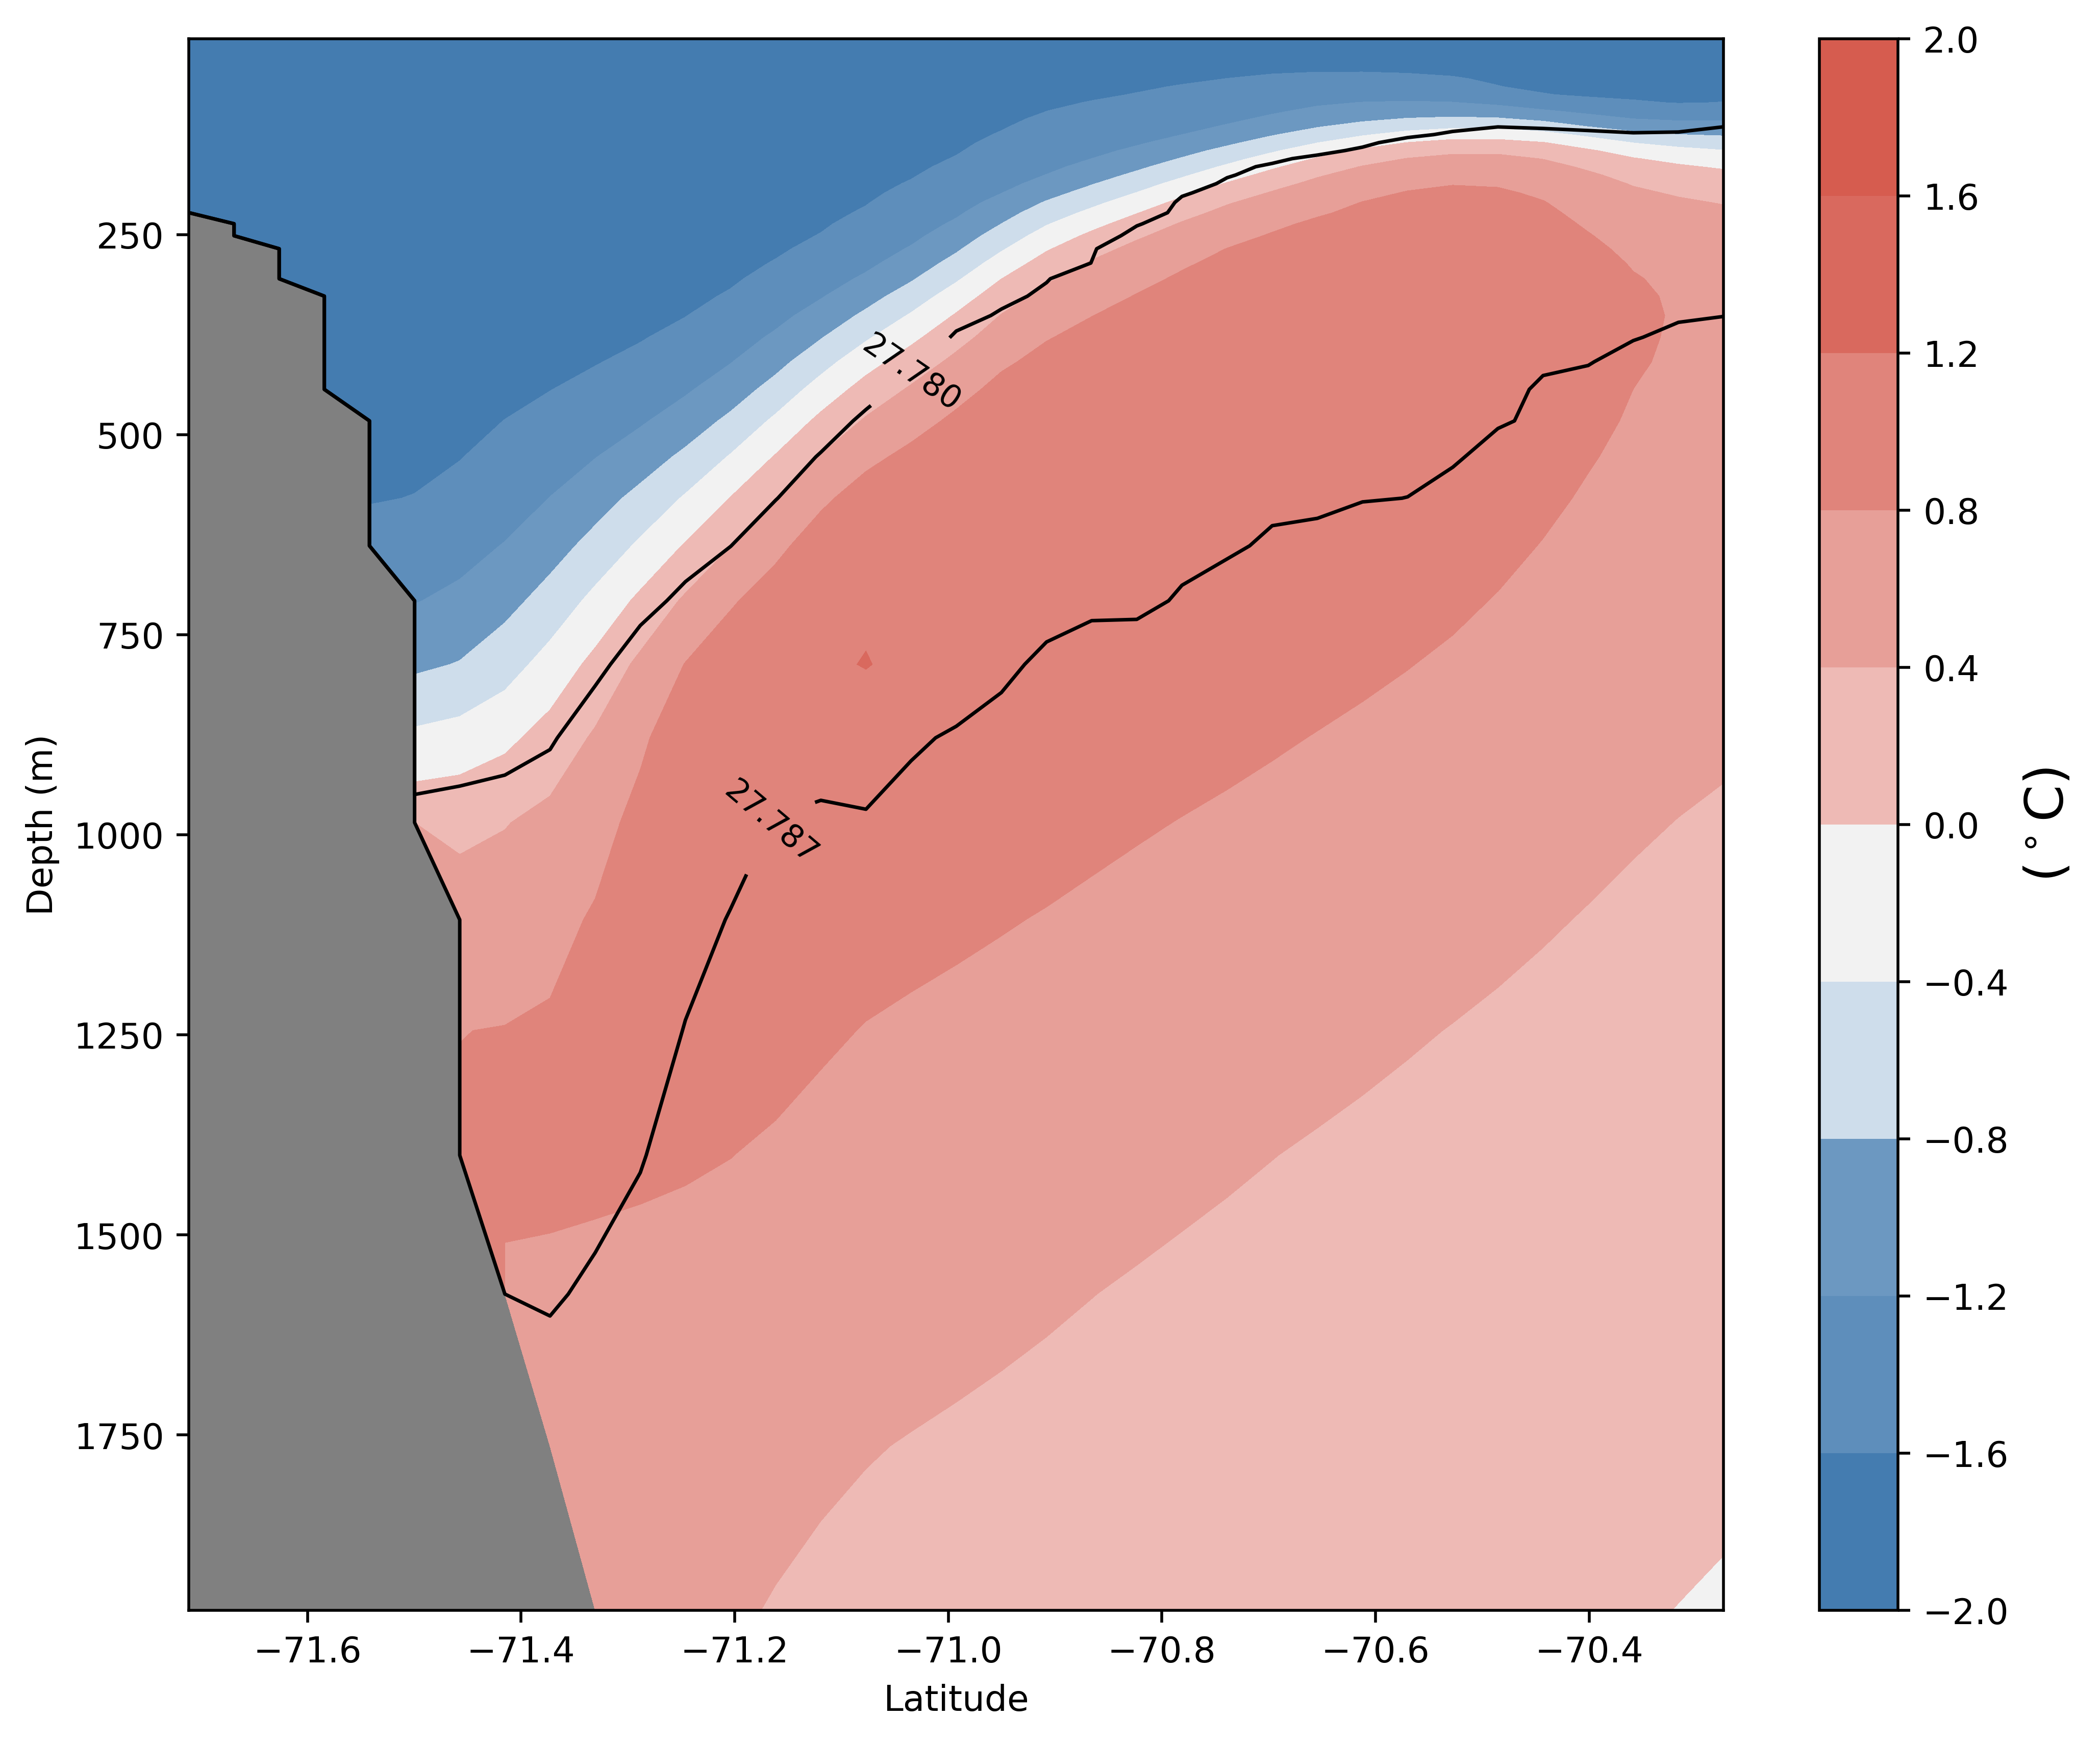

In [16]:
# plot the result
fig = plt.figure(figsize=(9.4, 7.7), dpi=500)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
#im = ax0.contourf(xx, yy, plotvar,cmap=new_cmap)
im = ax0.contourf(xx[:46,20:55], yy[:46,20:55], tem[:46,20:55],cmap=new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels)
CS = ax0.contour(xx[:46,20:55], yy[:46,20:55], PD[:46,20:55],[27.780,27.787],colors = 'black', linestyles = 'solid',linewidths=1)
ax0.set_facecolor("grey")
plt.clabel(CS, inline=1, fontsize=9)
cbar = fig.colorbar(im, ax=ax0,ticks=nice_levels)
cbar.set_label('($^\circ$C)', **my_font)
#ax0.set_title('Mixed Layer Depth')
#############################################################################
##设定X坐标值
#plt.xticks(range(0,151,30), ['63$^\circ$W', '60$^\circ$W', '57$^\circ$W', '54$^\circ$W', '51$^\circ$W','48$^\circ$W'])
#plt.yticks(range(0,46,5), ['5', '55','105', '155', '210', '285','408','638','1106','1968'])#,'3133','4375','5625'])
plt.xlabel('Latitude')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()
#ax0.set_title('Lontitude (15$^\circ$W) ,  Latitude(72.5$^\circ$S ~ 65.8$^\circ$S), Time(118-09)')
plt.savefig("temperature-cross.png",bbox_inches='tight',dpi=fig.dpi)